# Significance of Job Seniority





In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML

In [2]:
# Load dataset
workforce_data = pd.read_csv('https://raw.githubusercontent.com/jfkoehler/nyu_bootcamp_fa23/main/data/Sample_Workforce_Data_0720.csv')

### Preliminary Examination of Dataset

In [296]:
workforce_data.head()

,company,month,job_category,region,seniority,count,inflow,outflow,salary
0,AT&T,2019-12,sales,Northern America,1,37270.26916,214.52970,436.47480,2.384201e+09
1,AT&T,2019-12,sales,Northern America,2,32315.02453,205.26310,348.88871,2.521054e+09
2,AT&T,2019-12,management,Northern America,4,28258.35195,152.43552,266.43818,3.462059e+09
3,AT&T,2019-12,engineer,Northern America,2,25605.46197,161.13381,353.45090,2.213268e+09
4,AT&T,2019-12,management,Northern America,3,25471.30767,141.85224,253.19327,2.463751e+09


In [297]:
workforce_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523488 entries, 0 to 523487
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   company       523488 non-null  object 
 1   month         523488 non-null  object 
 2   job_category  523488 non-null  object 
 3   region        523488 non-null  object 
 4   seniority     523488 non-null  int64  
 5   count         523488 non-null  float64
 6   inflow        523488 non-null  float64
 7   outflow       523488 non-null  float64
 8   salary        522202 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 35.9+ MB


In [318]:
# Look at which companies are represented in the dataset
workforce_data['company'].value_counts()

General Electric Company          23040
Siemens AG                        23040
Pfizer Inc                        23040
Abbott Laboratories               22992
Johnson & Johnson                 22992
MICROSOFT CORPORATION             22896
Citigroup Inc                     22896
Coca-Cola Company                 22800
PepsiCo, Inc.                     22752
Walt Disney Company               22752
Alphabet Inc.                     22704
Amazon.com, Inc.                  22464
Verizon Communications Inc.       22416
AT&T                              22224
Walgreens Boots Alliance, Inc.    21984
Facebook Inc                      21840
JPMorgan Chase                    21696
Walmart Inc                       21456
Bank of America Corporation       20736
Morgan Stanley                    20688
Comcast Corporation               20496
UnitedHealth Group Inc            19488
Target Corporation                18384
The Goldman Sachs Group, Inc.     17712
Name: company, dtype: int64

In [299]:
# Look at which job categories are represented in the dataset
workforce_data['job_category'].value_counts()

management        69120
finance           68400
engineer          67920
sales             67680
marketing         65088
administrative    63312
technician        61104
scientist         60864
Name: job_category, dtype: int64

In [300]:
# Look at which regions are represented in the dataset
workforce_data['region'].value_counts()

Northern America                     36864
Southern Asia                        36672
Northern Europe                      36432
Western Europe                       35712
South-Eastern Asia                   35664
South America                        35424
Eastern Asia                         35376
Southern Europe                      35040
Pacific Islands                      34848
Sub-Saharan Africa                   34608
Central America and the Caribbean    34272
Eastern Europe                       34224
Arab States                          34224
Central and Western Asia             32736
Northern Africa                      31392
Name: region, dtype: int64

In [301]:
# Look at the distribution of "seniority" in the dataset
workforce_data['seniority'].value_counts()

2    135792
1    135264
3    131376
4    121056
Name: seniority, dtype: int64

Based on some preliminary examination of the given dataset, I found an interesting question to explore with the data. In the dataset, we see that across the different companies and industries in different parts of the world, a key defining feature of a job position is seniority. From a common perception of seniority, one might think that attaining seniority in a workplace is worth the time and effort, as the title likely will come with higher salary and other "perks." However, it is worth questioning this assumption again. Are the monetary or other benefits of high seniority equal among different industries? Are they equal in all parts of the world? Or even more basically, do senior workers actually get paid more than junior workers? I aim to inquire deeper into <strong>meaning of seniority across various industries, job categories and regions. </strong>

### Research Question: What are the benefits brought upon by attaining seniority in workplace?

##### To answer this question, I will examine the following sub-questions in my analysis.
- Are there less senior workers than junior workers? 
- Do senior workers get a higher salary than junior workers?
- Do senior workers have higher job satisfaction than junior workers?

### Question 1. Are there less senior workers than junior workers?

In [319]:
# Create a data frame with 'seniority' and 'count' columns
q1_1 = workforce_data[['seniority', 'count']]
q1_1 = q1_1.dropna()

In [320]:
# Group by seniority to see the number of employees in each seniority
q1_1 = q1_1.groupby('seniority').mean()
q1_1

,count
seniority,
1,890.624546
2,715.737910
3,402.323282
4,366.770679


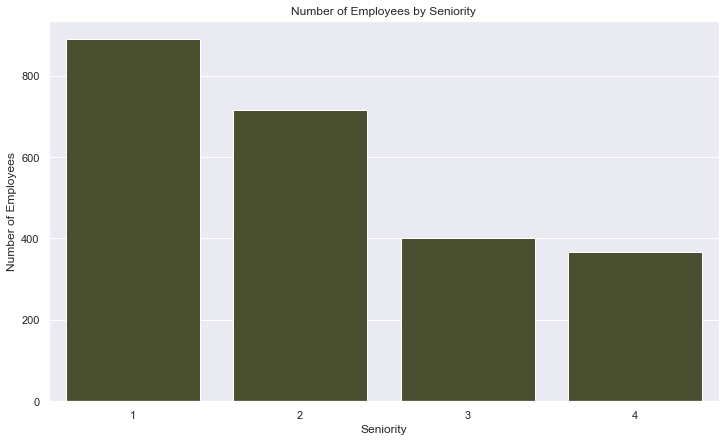

In [321]:
sns.barplot(data=q1_1, x=q1_1.index, y=q1_1['count'], color='#4e552a').set(title='Number of Employees by Seniority')
plt.xlabel('Seniority')
plt.ylabel('Number of Employees');

The two cells above show that <strong> as the seniority of a job position increases, the number of employees decreases.</strong> In other words, there are less positions for senior workers than there are for junior workers. In fact, the table above shows that the number of senior workers is less than half of the number of junior workers. This suggests that there will be <strong> high competition among junior workers to rise in seniority </strong>, as the number of open positions for senior workers is limited. Hence, we see that getting seniority in workplace will require a lot of time and effort. 

However, does the number of employees decrease with seniority in every job category? To fully understand the potential difficulty of getting seniority, we need to examine the situation <u> in different sectors. </u>

In [322]:
# Create a data frame with 'job_category', 'count' and 'seniority' columns
q1_2 = workforce_data[['seniority', 'count', 'job_category']]
q1_2 = q1_2.dropna()

In [323]:
# Data frame showing the number of employees by seniority in each job category
q1_2.groupby(['job_category', 'seniority']).mean()

count
job_category   seniority             
administrative 1           464.182358
               2           188.055155
               3            84.853136
               4            41.970161
engineer       1           405.566284
               2          1325.027819
               3           765.740592
               4           513.484979
finance        1           705.166051
               2           643.832533
               3           338.330067
               4           567.254853
management     1          1681.594616
               2          1661.578493
               3          1032.095227
               4           959.696726
marketing      1           381.569000
               2           268.739607
               3           141.246505
               4            60.440535
sales          1          2017.079309
               2           655.856193
               3           434.027300
               4           341.855937
scientist      1           413.270093
               2           435.321289
               3           196.668326
               4           175.131469
technician     1          1016.029983
               2           500.982828
               3           137.297727
               4            39.102698

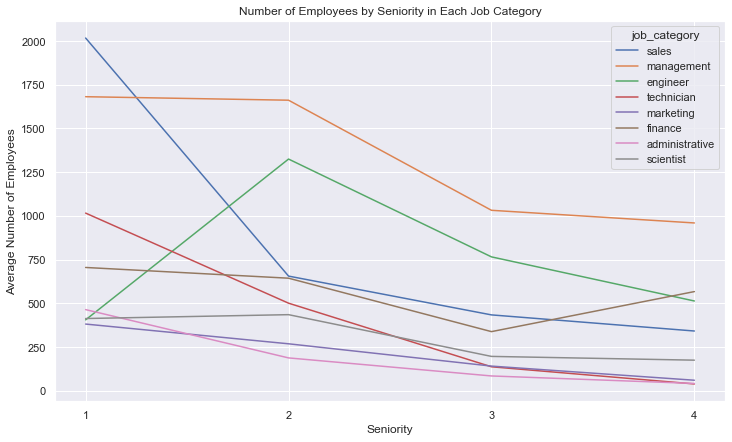

In [324]:
# Line plots showing the number of employees by seniority in each job category
sns.set(rc={"figure.figsize":(12, 7)})
sns.lineplot(data = q1_2, x = 'seniority', y = 'count', hue = 'job_category', ci=None).set(title='Number of Employees by Seniority in Each Job Category')
plt.xlabel('Seniority')
plt.ylabel('Average Number of Employees')
plt.xticks([1, 2, 3, 4]);

The above table and plot shows the number of employees by seniority in each job category. Most of the job categories show a similar pattern of number of employees by seniority as the previous plot with all of the job categories together, but there are a few deviations. 
- The most noticeable deviation is in among the <strong> engineers </strong>. <strong>The number of workers with seniority 1 is the least </strong> when compared to other seniorities. In fact, it is less than a third of that of seniority 2. When excluding seniority 1, seniority 2, 3, and 4 show a decreasing pattern in the number of employees. The reason for this may be that engineering is an industry that requires significant scientific background training, so the employees in engineering have the skillset to be employed as a seniority 2 worker. Hence, there are not as many entry level engineers, as most engineering workers start the job with seniority 2. 
- Although not as conspicuous as the engineers, the <strong> finance </strong> category also shows a deviation from the overall pattern, as there are <strong> more seniority 4 workers than that of seniority 3 </strong> . This may be because a significant portion of the decision makers in the finance industry come from backgrounds other than finance as well. Companies may hire professionals that had high seniority in other fields as senior 4 workers in finance, in hopes that they will add new perspectives to maintain and generate more profit. 
- The <strong> sales </strong> industry has the <strong> most significant drop in the number of employees with seniority 1 and that of seniority 2 </strong>. This shows that while there are a lot of entry-level jobs in the sales industry, it is very hard to get promoted to a higher seniority position, as the spaces are limited. 

Another question to ask is whether this pattern holds same <u> in different regions </u>. In some regions, the competition to gain seniority might be more than others due to sociocultural reasons. 

In [325]:
# Create a data frame with 'region', 'count' and 'seniority' columns
q1_3 = workforce_data[['seniority', 'count', 'region']]
q1_3 = q1_3.dropna()

In [326]:
# Data frame showing the number of employees by seniority in each region
q1_3.groupby(['region', 'seniority']).mean()

count
region                            seniority              
Arab States                       1             85.784782
                                  2            130.373122
                                  3             80.553856
                                  4             67.527006
Central America and the Caribbean 1            249.610609
                                  2            221.526310
                                  3            129.420620
                                  4            117.748276
Central and Western Asia          1             73.113520
                                  2            100.580175
                                  3             60.909751
                                  4             56.936495
Eastern Asia                      1            148.707960
                                  2            242.667736
                                  3            191.164886
                                  4            216.813844
Eastern Europe                    1            122.593725
                                  2            198.892477
                                  3            130.532015
                                  4            110.473612
Northern Africa                   1             77.378409
                                  2             87.172102
                                  3             46.480028
                                  4             41.755093
Northern America                  1          10087.562691
                                  2           6887.176572
                                  3           3535.784139
                                  4           2923.654728
Northern Europe                   1            428.950745
                                  2            544.633221
                                  3            322.263024
                                  4            315.773987
Pacific Islands                   1             61.501719
                                  2             86.541329
                                  3             65.072243
                                  4             53.706875
South America                     1            437.340555
                                  2            341.411292
                                  3            173.714307
                                  4            161.000632
South-Eastern Asia                1            236.828073
                                  2            283.992691
                                  3            166.041916
                                  4            149.261266
Southern Asia                     1            624.237791
                                  2            856.847475
                                  3            478.120376
                                  4            394.269342
Southern Europe                   1            142.507747
                                  2            188.986257
                                  3            122.834836
                                  4            112.880680
Sub-Saharan Africa                1             82.711077
                                  2             94.651179
                                  3             54.433110
                                  4             43.508433
Western Europe                    1            252.786427
                                  2            322.719603
                                  3            252.966739
                                  4            246.703405

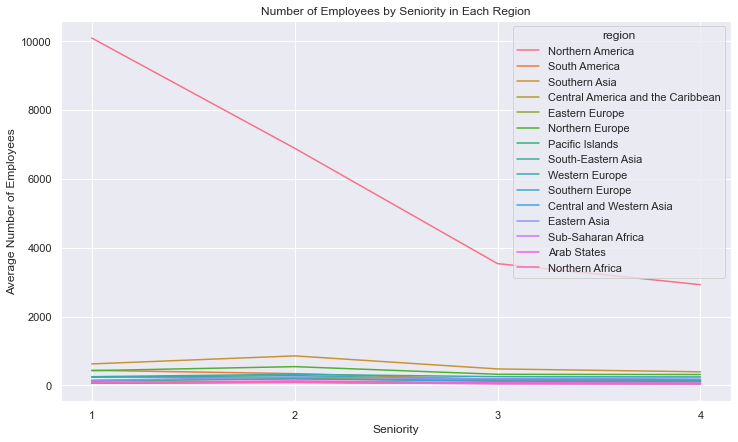

In [327]:
# Plot showing the number of employees by seniority in each region
sns.set(rc={"figure.figsize":(12, 7)})
sns.lineplot(data = q1_3, x = 'seniority', y = 'count', hue = 'region', ci=None).set(title='Number of Employees by Seniority in Each Region')
plt.xlabel('Seniority')
plt.ylabel('Average Number of Employees')
plt.xticks([1, 2, 3, 4]);

We see clearly in the above table that <strong> in Northern America, the pattern of decreasing number of employees with seniority is true </strong>. However, as there are many more employees from North America, compared to all other regions, the above table does not clearly show the pattern of the number of employes in other regions. Hence, I made another plot <u> excluding data points from Northern America.  </u>

In [328]:
# Data frame without data points from Northern America
q1_4 = q1_3.loc[q1_3['region'] != 'Northern America']

# Check to see that data points from Northern America are not included
q1_4['region'].value_counts()

Southern Asia                        36672
Northern Europe                      36432
Western Europe                       35712
South-Eastern Asia                   35664
South America                        35424
Eastern Asia                         35376
Southern Europe                      35040
Pacific Islands                      34848
Sub-Saharan Africa                   34608
Central America and the Caribbean    34272
Eastern Europe                       34224
Arab States                          34224
Central and Western Asia             32736
Northern Africa                      31392
Name: region, dtype: int64

In [329]:
# Data frame showing the number of employees by seniority in each region excluding Northern America
q1_4.groupby(['region', 'seniority']).mean()

count
region                            seniority            
Arab States                       1           85.784782
                                  2          130.373122
                                  3           80.553856
                                  4           67.527006
Central America and the Caribbean 1          249.610609
                                  2          221.526310
                                  3          129.420620
                                  4          117.748276
Central and Western Asia          1           73.113520
                                  2          100.580175
                                  3           60.909751
                                  4           56.936495
Eastern Asia                      1          148.707960
                                  2          242.667736
                                  3          191.164886
                                  4          216.813844
Eastern Europe                    1          122.593725
                                  2          198.892477
                                  3          130.532015
                                  4          110.473612
Northern Africa                   1           77.378409
                                  2           87.172102
                                  3           46.480028
                                  4           41.755093
Northern Europe                   1          428.950745
                                  2          544.633221
                                  3          322.263024
                                  4          315.773987
Pacific Islands                   1           61.501719
                                  2           86.541329
                                  3           65.072243
                                  4           53.706875
South America                     1          437.340555
                                  2          341.411292
                                  3          173.714307
                                  4          161.000632
South-Eastern Asia                1          236.828073
                                  2          283.992691
                                  3          166.041916
                                  4          149.261266
Southern Asia                     1          624.237791
                                  2          856.847475
                                  3          478.120376
                                  4          394.269342
Southern Europe                   1          142.507747
                                  2          188.986257
                                  3          122.834836
                                  4          112.880680
Sub-Saharan Africa                1           82.711077
                                  2           94.651179
                                  3           54.433110
                                  4           43.508433
Western Europe                    1          252.786427
                                  2          322.719603
                                  3          252.966739
                                  4          246.703405

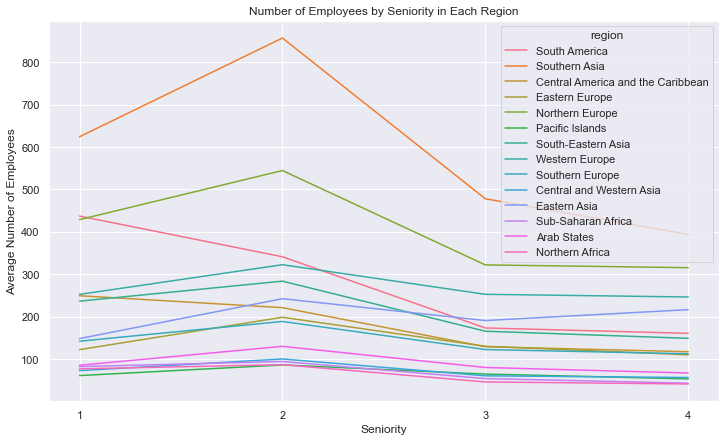

In [330]:
# Plot showing the number of employees by seniority in each region excluding Northern America
sns.set(rc={"figure.figsize":(12, 7)})
sns.lineplot(data = q1_4, x = 'seniority', y = 'count', hue = 'region', ci=None).set(title='Number of Employees by Seniority in Each Region')
plt.xlabel('Seniority')
plt.ylabel('Average Number of Employees')
plt.xticks([1, 2, 3, 4]);

The above plot shows the distribution of the number of employees by seniority in each region excluding Northern America. The results show a surprising pattern. In every region, excluding only Central America and the Caribbean and South America, <strong> there are more employees with seniority 2 than 1 </strong>. Considering that most of the firms represented in the dataset are US-based, this may signify that while Northern American workers have a lot of opportunities to work in entry-level jobs in these firms, workers from other regions have less opportunities for junior-level jobs. Workers from other regions may need to have a certain level of experience and expertise already in order to enter the job market for US-based firms as seniority 2 or higher workers. Hence the data may signal <strong> unequal job opportunities for recent graduates from regions other than North America that are looking for entry-level jobs in big corporations </strong>. The decreasing pattern in seniority 2, 3 and 4 is the same overall, showing that the competition among junior workers to get promoted to a senior-level job still exist in other regions.

➡️ To sum up, in Question 1, we showed that the overall pattern among all industries is that <strong> with seniority, the number of employees decreases </strong>. This encourages more competition among junior-level workers to get selected to be promoted. Now that I have established that attaining seniority requires competition and effort, we delve into the <u> monetary benefits </u> that follows seniority.

### Question 2. Do senior workers get a higher salary than junior workers?

In [331]:
# Create dataframe with 'seniority' and 'salary' column from original dataset
q2_1 = workforce_data[['seniority', 'salary']]
q2_1 = q2_1.dropna()

In [332]:
# Group by seniority
q2_1= q2_1.groupby('seniority').mean()
q2_1

,salary
seniority,
1,4.953236e+07
2,5.209023e+07
3,3.452210e+07
4,3.922296e+07


In [333]:
# Since the numbers in the 'salary' column are too big, we will change the unit to 10^7 USD
q2_1['salary'] = q2_1['salary'] / (10**7)
q2_1.columns = ['salary_USD(10m)']

In [334]:
q2_1

,salary_USD(10m)
seniority,
1,4.953236
2,5.209023
3,3.452210
4,3.922296


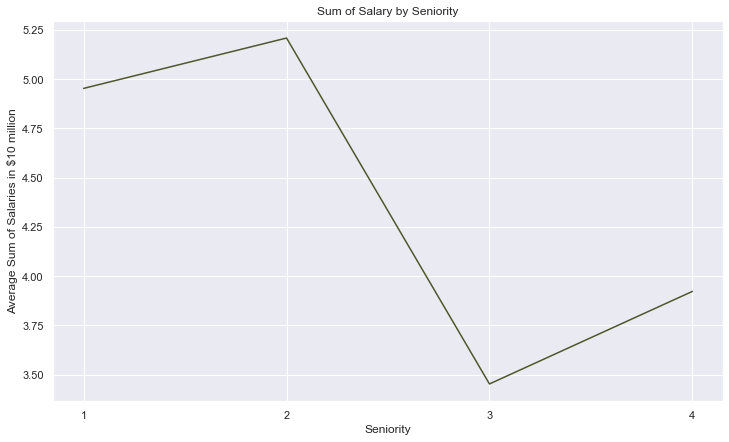

In [336]:
# Line plot of sum of salary by seniority
sns.lineplot(data=q2_1, x= q2_1.index, y=q2_1['salary_USD(10m)'], color='#4e552a').set(title='Sum of Salary by Seniority')
plt.xlabel('Seniority')
plt.ylabel('Average Sum of Salaries in $10 million')
plt.xticks([1, 2, 3, 4]);

The two cells above show how salary varies with level of seniority. It is important to keep in mind that <strong> salary in this dataset shows the sum of salaries of employees in the particular granularity level</strong>. Therefore, if there are more employees a particular granularity, the column "salary" may be a high value, but this does not necessarily mean that the salary for each individual employee is high. 


The line plot above shows that the sum of salaries is the highest in seniority 2, decreases rapidly in seniority 3 and slightly increases in seniority 4. <u>This plot itself does not speak much about the salary of an individual employee.</u> Therefore, it is important to consider the results from Question 1 as well. 

In [337]:
# q1_1 is the dataframe with the average number of employees in each seniority level. 
# add a column 'salary_each_USD(10m)' to find the average salary received by each employee by seniority level

q2_1['salary_each_USD(10m)'] = q2_1['salary_USD(10m)'] / q1_1['count']
q2_1

,salary_USD(10m),salary_each_USD(10m)
seniority,,
1,4.953236,0.005562
2,5.209023,0.007278
3,3.452210,0.008581
4,3.922296,0.010694


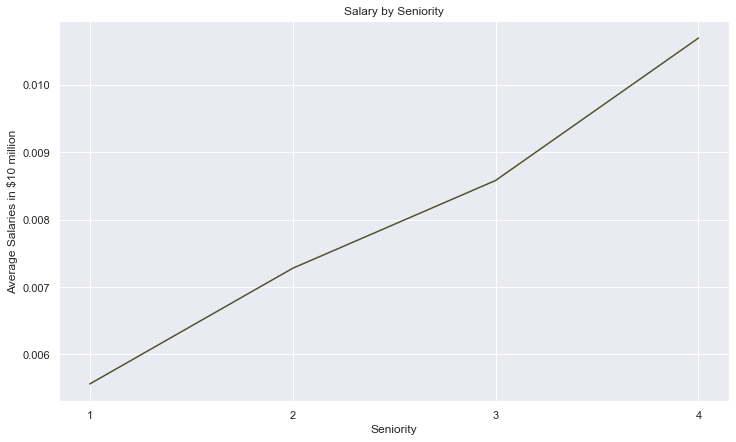

In [339]:
# Line plot of salary by seniority of each individual
sns.lineplot(data=q2_1, x= q2_1.index, y=q2_1['salary_each_USD(10m)'], color='#4e552a').set(title='Salary by Seniority')
plt.xlabel('Seniority')
plt.ylabel('Average Salaries in $10 million')
plt.xticks([1, 2, 3, 4]);

The above line plot shows the average salary received per individual employee by seniority. We see that <strong> each employee's salary is expected to increase with seniority.</strong> The average income for an employee with seniority 4 is more than double that of seniority 1. This conforms to the common conception that senior employees will get paid more than junior employees. They are the workers that have worked longer in the company, have more experience in their jobs and were selected to be promoted in the competition among junior workers. This suggests that <strong>there is monetary compensation coming with the higher seniority, which might make it worthwhile to attain seniority. </strong>

Now, as in Question 1, I will look at the same pattern in each job category. 

In [340]:
# Create a data frame with 'job_category', 'salary' and 'seniority' columns
q2_2 = workforce_data[['seniority', 'salary', 'job_category']]
q2_2 = q2_2.dropna()
q2_2['salary'] = q2_2['salary'] / (10**7)
q2_2['salary'] = q2_2['salary']/ workforce_data['count']
q2_2.columns = ['seniority','salary_each_USD(10m)', 'job_category']
q2_2

,seniority,salary_each_USD(10m),job_category
0,1,0.006397,sales
1,2,0.007801,sales
2,4,0.012251,management
3,2,0.008644,engineer
4,3,0.009673,management
...,...,...,...
523479,4,0.010234,scientist
523480,4,0.007616,administrative
523481,4,0.009702,administrative
523482,4,0.002911,engineer


In [341]:
# Data frame showing the salary by seniority in each job category
q2_2 = q2_2.groupby(['job_category', 'seniority'], as_index=False).mean()
q2_2

,job_category,seniority,salary_each_USD(10m)
0,administrative,1,0.002675
1,administrative,2,0.003953
2,administrative,3,0.005075
3,administrative,4,0.006149
4,engineer,1,0.003849
5,engineer,2,0.004342
6,engineer,3,0.005031
7,engineer,4,0.005918
8,finance,1,0.003376
9,finance,2,0.003866


In [342]:
# Make a separate data frame for each job category
# Append all data frames to an empty dictionary to use for plotting. The key is the job category and value is the dataframe

q2_2_dict = {}
job_list = ['sales', 'management', 'engineer', 'technician', 'marketing', 'finance', 'administrative', 'scientist']
for job in job_list:
    
    q2_2_dict[job] = q2_2.loc[q2_2['job_category'] == job]

# This dictionary holds the job categories as its keys and the dataframes for each job category as its values
q2_2_dict

{'sales':    job_category  seniority  salary_each_USD(10m)
 20        sales          1              0.003155
 21        sales          2              0.004002
 22        sales          3              0.004968
 23        sales          4              0.006258,
 'management':    job_category  seniority  salary_each_USD(10m)
 12   management          1              0.003433
 13   management          2              0.004048
 14   management          3              0.004880
 15   management          4              0.006503,
 'engineer':   job_category  seniority  salary_each_USD(10m)
 4     engineer          1              0.003849
 5     engineer          2              0.004342
 6     engineer          3              0.005031
 7     engineer          4              0.005918,
 'technician':    job_category  seniority  salary_each_USD(10m)
 28   technician          1              0.003092
 29   technician          2              0.003942
 30   technician          3              0.004781
 31

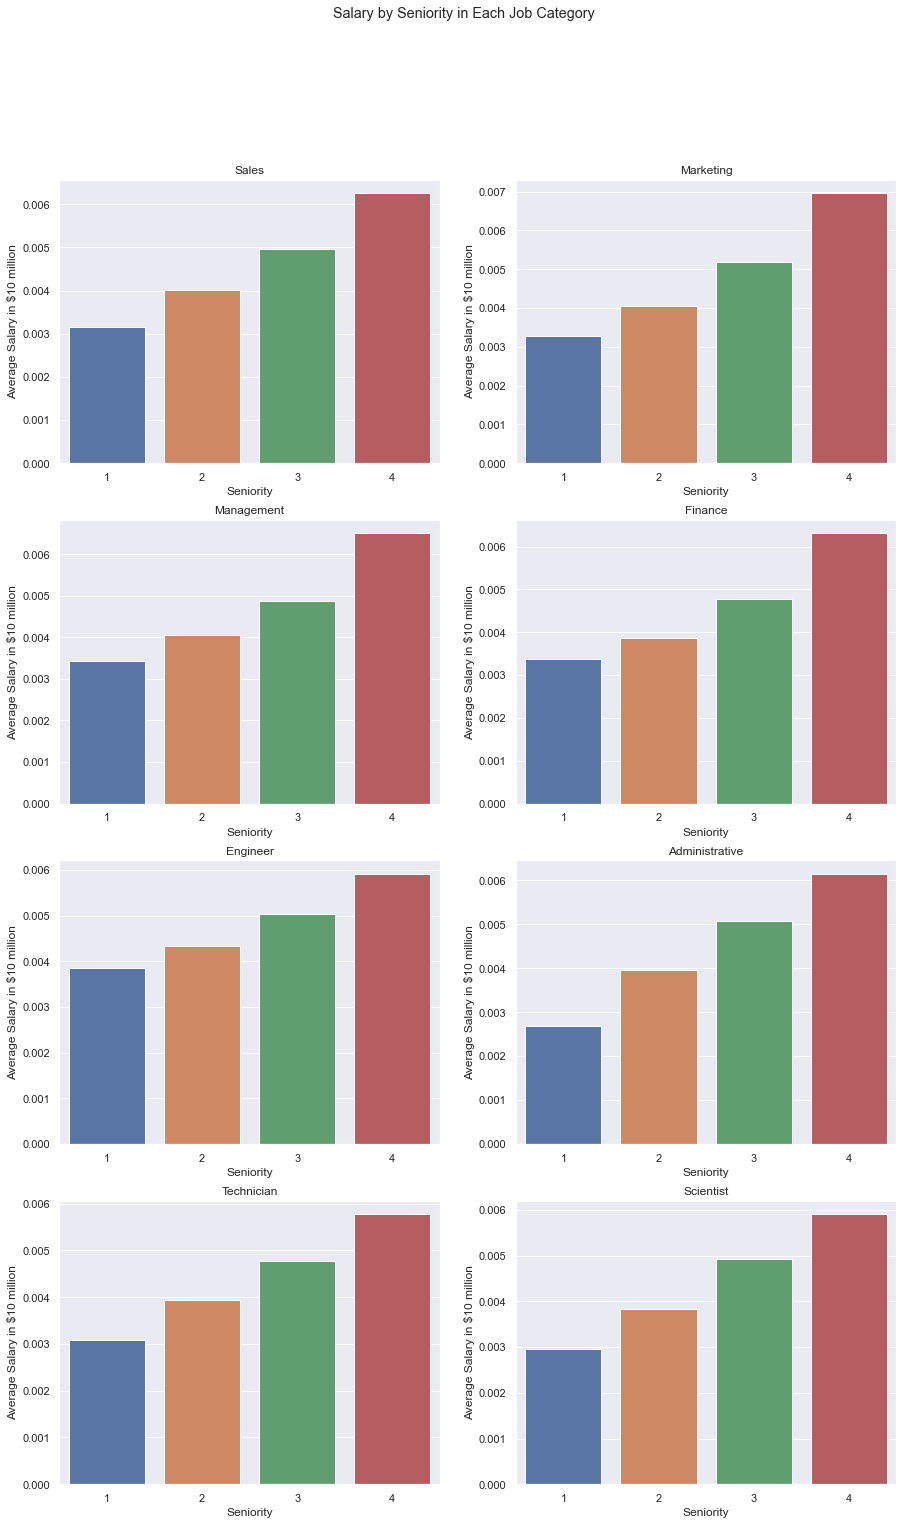

In [344]:
# Bar plots showing the mean salary by seniority in each job category
fig, ax = plt.subplots(4, 2, figsize = (15,24))
fig.suptitle('Salary by Seniority in Each Job Category')

for job in list(q2_2_dict.keys()):
    
    if (job_list.index(job) < 4):
        m= job_list.index(job)
        n = 0
    else:
        m= job_list.index(job) - 4
        n = 1

    sns.barplot(data= q2_2_dict[job], x='seniority', y='salary_each_USD(10m)', ci=None, ax = ax[m, n]);
    ax[m, n].set_title(job.capitalize())
    ax[m, n].set_xlabel('Seniority')
    ax[m, n].set_ylabel('Average Salary in $10 million');

The above figure shows the change in mean salary of each individual employee by seniority in each job category. The results are as commonly expected. All of the job categories show the same pattern as the overall trend. In all job categoroes, <strong> those with higher seniority receive higher salaries. </strong>In most of the job categories, those in seniority 4 receive approximately double the salary of those in seniority 1. In the engineering sector, this difference is slightly less, as those in seniority 1 have a higher salary than those in other job categories. 

This result shows that being a senior worker has a lot of financial benefits, as the salary increases with seniority level. Moreover, although not reflected in this dataset, <strong>many companies provide various perks other than financial benefits,</strong> such as shares of the company itself, large "bonuses" that are not included in the official salary, and providing accomodation and children's education that may be worth more than the salary itself. These additional benefits are likely to increase with seniority as well. Hence, <strong>the results suggest that attaining seniority may be worthwhile the time and effort needed in the process, because of the finanical compensation. </strong>

Next, I will delve into how the pattern shows itself in <u> different regions </u>. This question may show interesting results, because the change in salary with seniority may vary depending on sociocultural factors such as emphasis on meritocracy and a sense of vertical hierarchy in the workplace. Such factors often vary from region to region. 

In [345]:
# Create a data frame with 'region', 'salary' and 'seniority' columns
q2_3 = workforce_data[['seniority', 'salary', 'region']]
q2_3 = q2_3.dropna()
q2_3['salary'] = q2_3['salary'] / (10**7)
q2_3['salary'] = q2_3['salary']/ workforce_data['count']
q2_3.columns = ['seniority','salary_each_USD(10m)', 'region']
q2_3

,seniority,salary_each_USD(10m),region
0,1,0.006397,Northern America
1,2,0.007801,Northern America
2,4,0.012251,Northern America
3,2,0.008644,Northern America
4,3,0.009673,Northern America
...,...,...,...
523479,4,0.010234,Pacific Islands
523480,4,0.007616,Southern Europe
523481,4,0.009702,Pacific Islands
523482,4,0.002911,Central America and the Caribbean


In [346]:
# Data frame showing the number of employees by seniority in each region
q2_3 = q2_3.groupby(['region', 'seniority'], as_index=False).mean()
q2_3

,region,seniority,salary_each_USD(10m)
0,Arab States,1,0.003299
1,Arab States,2,0.004073
2,Arab States,3,0.005106
3,Arab States,4,0.006499
4,Central America and the Caribbean,1,0.001823
5,Central America and the Caribbean,2,0.002152
6,Central America and the Caribbean,3,0.002680
7,Central America and the Caribbean,4,0.003233
8,Central and Western Asia,1,0.002778
9,Central and Western Asia,2,0.003850


In [347]:
# Make a separate data frame for each region
# Append all data frames to an empty dictionary to use for plotting. The key is the region and value is the dataframe

q2_3_dict = {}
region_list = ['Arab States', 'Central America and the Caribbean','Central and Western Asia', 'Eastern Asia', 'Eastern Europe', 'Northern Africa', 'Northern America', 'Northern Europe', 'Pacific Islands', 'South America', 'South-Eastern Asia','Southern Asia', 'Southern Europe', 'Sub-Saharan Africa', 'Western Europe']
for region in region_list:
    
    q2_3_dict[region] = q2_3.loc[q2_3['region'] == region]

# This dictionary holds the regions as its keys and the dataframes for each region as its values
q2_3_dict

{'Arab States':         region  seniority  salary_each_USD(10m)
 0  Arab States          1              0.003299
 1  Arab States          2              0.004073
 2  Arab States          3              0.005106
 3  Arab States          4              0.006499,
 'Central America and the Caribbean':                               region  seniority  salary_each_USD(10m)
 4  Central America and the Caribbean          1              0.001823
 5  Central America and the Caribbean          2              0.002152
 6  Central America and the Caribbean          3              0.002680
 7  Central America and the Caribbean          4              0.003233,
 'Central and Western Asia':                       region  seniority  salary_each_USD(10m)
 8   Central and Western Asia          1              0.002778
 9   Central and Western Asia          2              0.003850
 10  Central and Western Asia          3              0.004873
 11  Central and Western Asia          4              0.006263,
 '

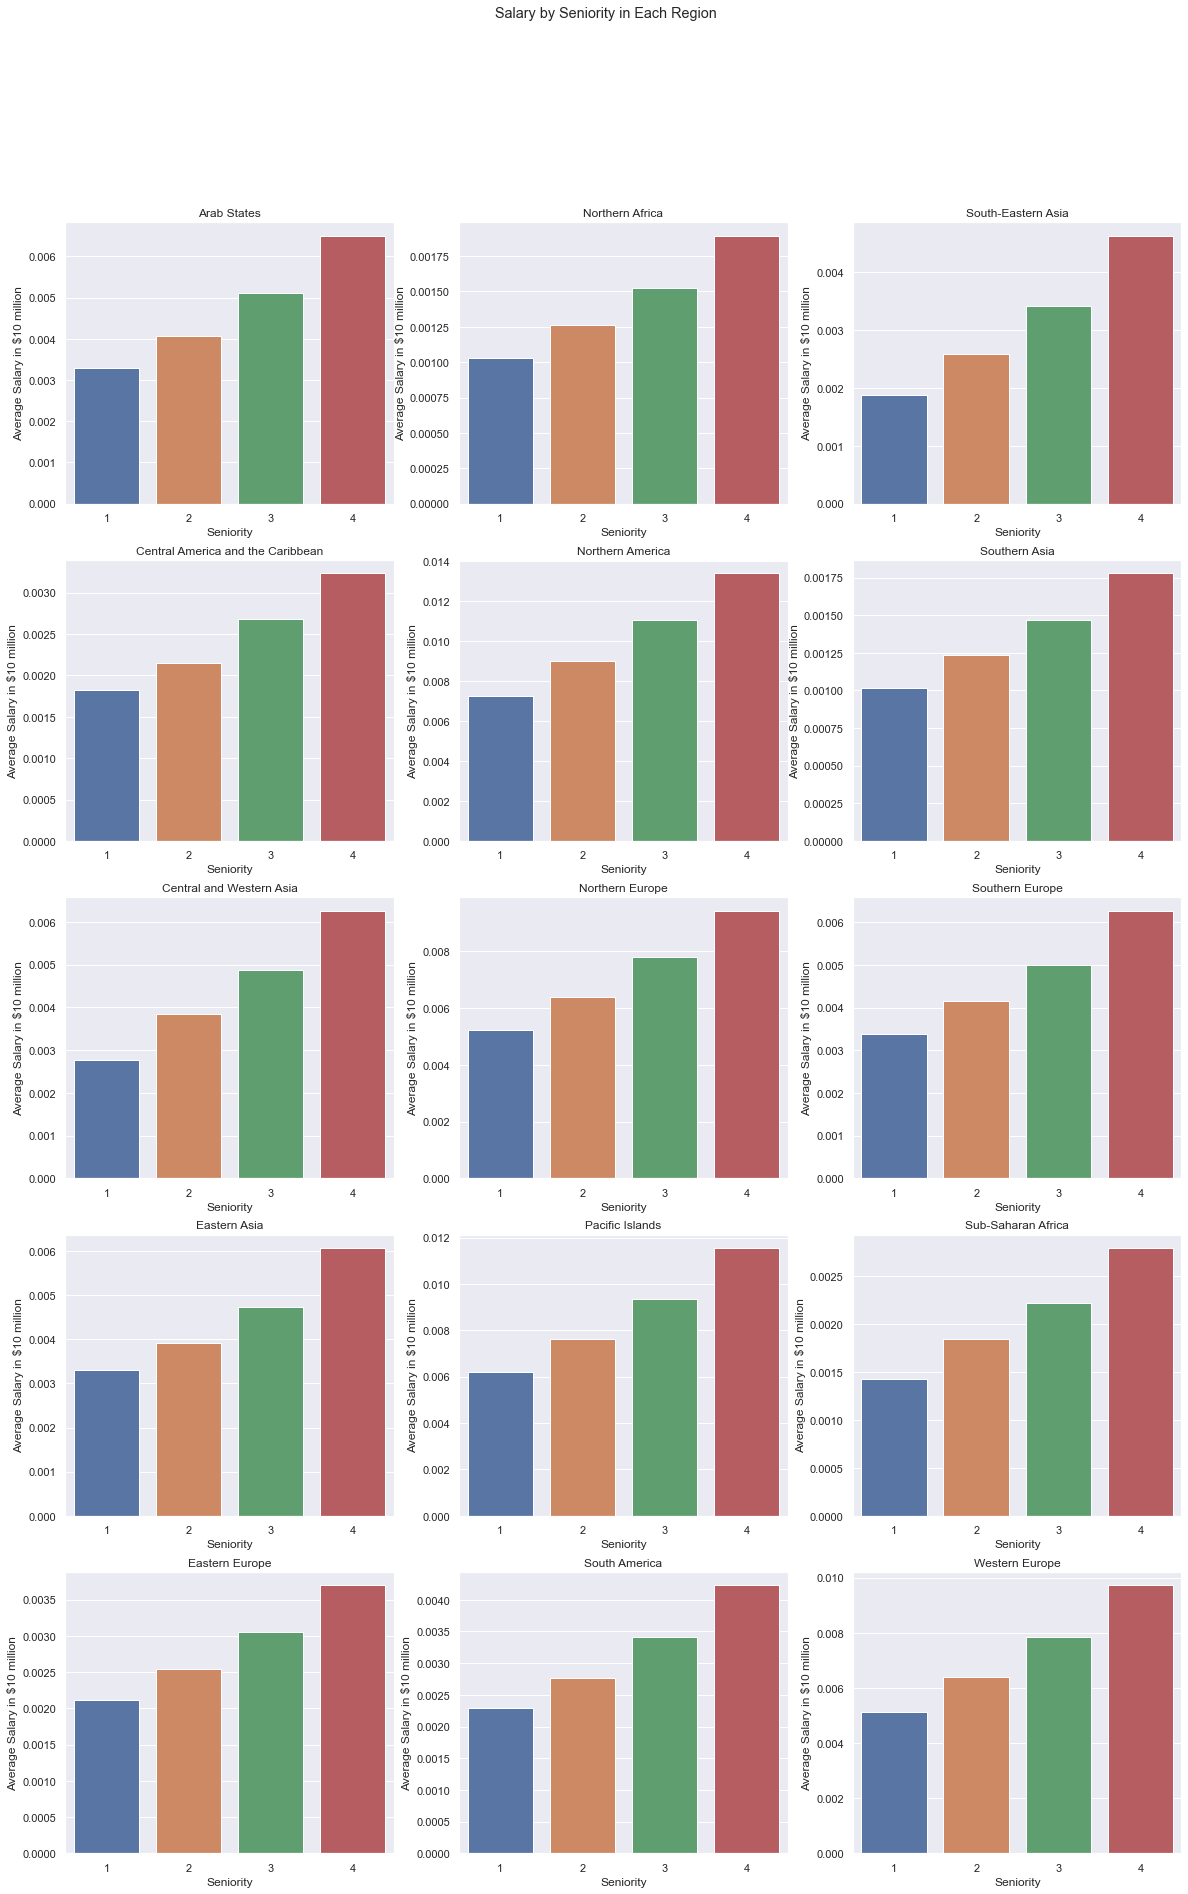

In [348]:
# Bar plots showing the mean salary by seniority in each region
fig, ax = plt.subplots(5, 3, figsize = (20,30))
fig.suptitle('Salary by Seniority in Each Region')

for region in list(q2_3_dict.keys()):
    
    if (region_list.index(region) < 5):
        m= region_list.index(region)
        n = 0
    elif (region_list.index(region) < 10):
        m= region_list.index(region)-5
        n = 1
    elif (region_list.index(region) < 15):
        m= region_list.index(region) - 10
        n = 2

    sns.barplot(data= q2_3_dict[region], x='seniority', y='salary_each_USD(10m)', ci=None, ax = ax[m, n]);
    ax[m, n].set_title(region)
    ax[m, n].set_xlabel('Seniority')
    ax[m, n].set_ylabel('Average Salary in $10 million');

The plots above also show that the pattern of the mean salary received by each employee depending on their seniority level conforms to the overall pattern. <strong> The mean salary of each worker seems to increase with seniority </strong>. In most of the regions, the increase is generally linear in that the difference in mean salary between seniorities is largely constant. 
- The difference between salaries of seniority 1 employees and that of seniority 4 employees is <strong>especially conspicuous in South-Eastern Asia and Central and Western Asia</strong>, as seniority 4 employees get more than double the salary of seniority 1 employees. The reason behind this may be cultural elements in Asian countries where the work culture is vertical in that there is a strict hierarchy between employees depending on the level of seniority and that the culture puts more emphasis on meritocracy, thus awarding senior workers, who made more progress for the company, with much higher salaries than junior workers. 
- Meanwhile, in<strong> Northern Africa, Eastern Europe, Pacific Islands, and Sub-Saharan Africa, this difference is slightly less. </strong> In these regions, the emphasis on meritocracy might be less and the general work culture might be more horizontal than the aforementioned Asian countries. Further analysis focusing on these factors require additional data on cultural factors that are not included in this dataset. 

➡️ In Question 2, we showed that in terms of salary, <strong> seniority tends to increase the salary that one receives </strong>. The pattern is consistent across different job categories and regions. Higher salary may be a key reason why companies limit the number of positions for higher seniority employees and why many junior employees need to compete with one another to get promoted. These results show that there is significant monetary rewards to attaining seniority. 

### Question 3. Do senior workers have lower turnover rate than junior workers?

Now that we have seen the monetary benefits of higher senority, we consider another important measure of whether higher seniority is really worth it: <u>job satisfaction</u>. There is no direct indicator of job satisfaction in this dataset, but we can <strong>indirectly measure it by seeing how the change in the number of employees in the particular granularity.</strong> It can be reasonably assumed that if the job position is satisfactory, the employee will likely stay in his/her position and if unsatisfactory, leave the position in search for a better one. Also, if a particular position is desirable, other workers would be willing to get the job and hence the number of incoming employees will be high as well. Therefore, the analysis for Question 3 will consider the <strong>difference between the total inflow and total outflow of employees </strong>to indirectly measure job satisfaction. If the difference is positive (i.e. more inflow than outflow), then the position is likely satisfactory to many employees and if the difference is negative (i.e. more outflow than inflow), the job is likely to be unsatisfactory. 

In [349]:
# Create dataframe with 'seniority', 'outflow' and 'inflow' column from original dataset
q4_1 = workforce_data[['seniority', 'outflow', 'inflow']]
q4_1 = q4_1.dropna()

# 'change' is the column representing the difference between total inflow and total outflow of employees 
q4_1['change'] = q4_1['inflow']-q4_1['outflow']

In [350]:
# Group by seniority
q4_1= q4_1.groupby('seniority').mean()
q4_1

,outflow,inflow,change
seniority,,,
1,10.186572,11.241114,1.054542
2,8.443763,11.042921,2.599158
3,4.898830,6.382353,1.483523
4,3.976140,5.370223,1.394083


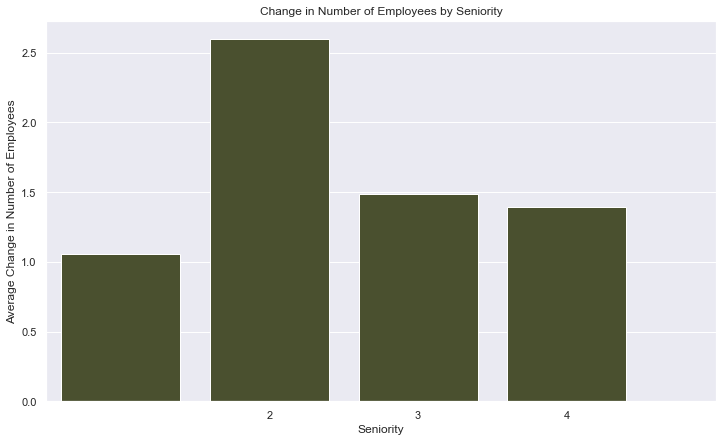

In [351]:
# Bar plot of change in number of employees by seniority
sns.barplot(data=q4_1, x= q4_1.index, y=q4_1['change'], color='#4e552a').set(title='Change in Number of Employees by Seniority')
plt.xlabel('Seniority')
plt.ylabel('Average Change in Number of Employees')
plt.xticks([1, 2, 3, 4]);

The above graph shows the change in number of employees by seniority. The result is interesting, as <strong>jobs with seniority level 2 have the highest change in number of employees, while other seniority levels have similar values. </strong> Before thinking of the potential reasons behind this, it is important to recognize that as the change in the number of employee is calulated as total inflow subtracted by total outflow, there are two cases in which the high value for seniority 2 might have occured. 
- Total inflow into seniority 2 is much higher than total outflow
- Total outflow from seniority 2 is much higher than total inflow

The two cases lead to differing interpretations to the results. Therefore, I will plot the <u>inflow and outflow of employees </u>to see which case we should consider in our interpretation. 

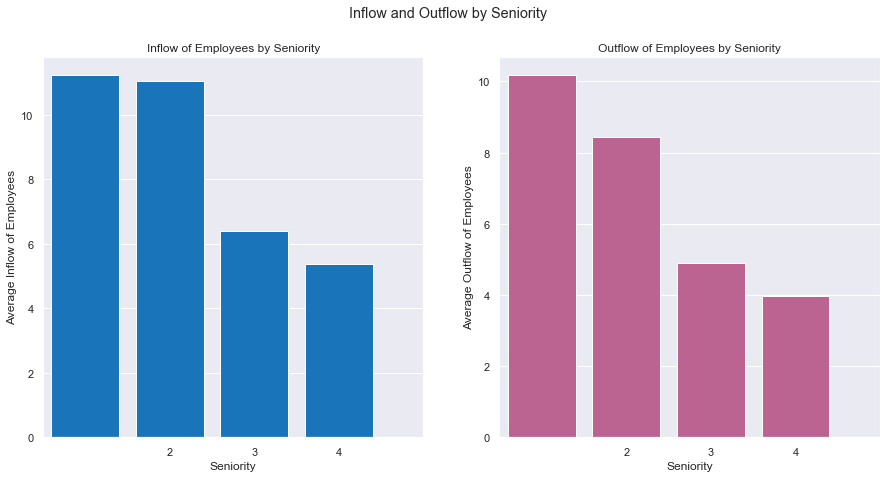

In [352]:
# Bar plot of total inflow and outflow by seniority
fig, ax = plt.subplots(1, 2, figsize= (15, 7))
fig.suptitle('Inflow and Outflow by Seniority')
sns.barplot(data=q4_1, x= q4_1.index, y=q4_1['inflow'], color='#0078d4', ax=ax[0]).set(title='Inflow of Employees by Seniority')
ax[0].set_xlabel('Seniority')
ax[0].set_ylabel('Average Inflow of Employees')
ax[0].set_xticks([1, 2, 3, 4])
sns.barplot(data=q4_1, x= q4_1.index, y=q4_1['outflow'], color='#ca5492', ax=ax[1]).set(title='Outflow of Employees by Seniority')
ax[1].set_xlabel('Seniority')
ax[1].set_ylabel('Average Outflow of Employees')
ax[1].set_xticks([1, 2, 3, 4]);

The plots of inflow and outflow of employees provide a clearer picture of the results displayed on the plot on the change in the number of employees. Above, we see that for jobs with seniority 1, 3, and 4, the average inflow and outflow are approximately 1 unit apart. Therefore, their difference is around 1. However, <strong>for jobs with seniority 2, the inflow of employees is much higher than outflow</strong>, as they differ by around 3 units. This is reflected in the previous graph on the change in the number of employees, as there are more people coming into the position than leaving, compared to jobs with other seniority levels.  

Now, focusing on the overall trend in the change in the number of employees by seniority, the results do not seem to support the argument that the job satisfaction is much higher for jobs with higher seniorities. All of the values for change in the number of employees is positive, meaning that there are more workers coming in than going out. Moreover, the magnitude of the change is the highest in jobs with seniority 2 than those with higher seniorities, showing that jobs with seniority 2 are more popular, which may signal higher job satisfaction. Moreover, although the magnitude is small, the value decreases from seniority 3 to 4, signaling that there seems to be higher job satisfaction in seniority 3 than in 4. Therefore, <strong>there does not seem to be much evidence that having higher seniority leads to higher job satisfaction. </strong>

With higher seniority comes more responsibility, as senior employees are generally in charge of large projects in their companies and they have to be responsible in training and teaching junior employees. This may require more time committment and effort, which negatively impacts job satisfaction. Hence, despite the monetary benefits that comes with higher seniority, some might not find working as senior employees as satisfactory. 

Now, I will continue the analysis on the change in number of employees across <u> different job categories.</u> Different types of jobs have different working cultures that may significantly alter job satisfaction. 

In [251]:
workforce_data.head()

,company,month,job_category,region,seniority,count,inflow,outflow,salary
0,AT&T,2019-12,sales,Northern America,1,37270.26916,214.52970,436.47480,2.384201e+09
1,AT&T,2019-12,sales,Northern America,2,32315.02453,205.26310,348.88871,2.521054e+09
2,AT&T,2019-12,management,Northern America,4,28258.35195,152.43552,266.43818,3.462059e+09
3,AT&T,2019-12,engineer,Northern America,2,25605.46197,161.13381,353.45090,2.213268e+09
4,AT&T,2019-12,management,Northern America,3,25471.30767,141.85224,253.19327,2.463751e+09


In [353]:
# Create dataframe with 'seniority', 'outflow', 'inflow' and 'job_category' column from original dataset
q4_2 = workforce_data[['seniority', 'outflow', 'inflow', 'job_category']]
q4_2 = q4_2.dropna()

# 'change' is the column representing the difference between total inflow and total outflow of employees 
q4_2['change'] = q4_2['inflow']-q4_2['outflow']
q4_2

,seniority,outflow,inflow,job_category,change
0,1,436.47480,214.52970,sales,-221.94510
1,2,348.88871,205.26310,sales,-143.62561
2,4,266.43818,152.43552,management,-114.00266
3,2,353.45090,161.13381,engineer,-192.31709
4,3,253.19327,141.85224,management,-111.34103
...,...,...,...,...,...
523483,4,0.00000,0.00000,administrative,0.00000
523484,3,0.00000,0.00000,administrative,0.00000
523485,4,0.00000,0.00000,technician,0.00000
523486,4,0.00000,0.00000,sales,0.00000


In [354]:
# Data frame showing the change in the number of employees by seniority in each job category
q4_2 = q4_2.groupby(['job_category', 'seniority'], as_index=False).mean()
q4_2

,job_category,seniority,outflow,inflow,change
0,administrative,1,4.182284,4.346309,0.164025
1,administrative,2,2.611596,3.548184,0.936588
2,administrative,3,1.279997,1.654533,0.374536
3,administrative,4,0.602935,0.676214,0.073280
4,engineer,1,10.701710,13.868308,3.166598
5,engineer,2,18.225098,27.922867,9.697770
6,engineer,3,10.620340,14.498756,3.878416
7,engineer,4,7.147631,10.641024,3.493393
8,finance,1,11.592522,13.606268,2.013746
9,finance,2,7.993240,9.687534,1.694294


In [355]:
# Make a separate data frame for each job category
# Append all data frames to an empty dictionary to use for plotting. The key is the job category and value is the dataframe

q4_2_dict = {}
job_list = ['sales', 'management', 'engineer', 'technician', 'marketing', 'finance', 'administrative', 'scientist']
for job in job_list:
    
    q4_2_dict[job] = q4_2.loc[q2_2['job_category'] == job]

# This dictionary holds the job categories as its keys and the dataframes for each job category as its values
q4_2_dict

{'sales':    job_category  seniority    outflow     inflow    change
 20        sales          1  15.141603  14.090997 -1.050606
 21        sales          2   7.457643   9.049058  1.591415
 22        sales          3   5.879582   7.390680  1.511098
 23        sales          4   4.725048   5.703202  0.978155,
 'management':    job_category  seniority    outflow     inflow    change
 12   management          1  20.903526  22.911226  2.007700
 13   management          2  17.734028  20.997217  3.263189
 14   management          3  10.158333  12.995831  2.837498
 15   management          4   8.566996  11.200443  2.633447,
 'engineer':   job_category  seniority    outflow     inflow    change
 4     engineer          1  10.701710  13.868308  3.166598
 5     engineer          2  18.225098  27.922867  9.697770
 6     engineer          3  10.620340  14.498756  3.878416
 7     engineer          4   7.147631  10.641024  3.493393,
 'technician':    job_category  seniority   outflow    inflow    ch

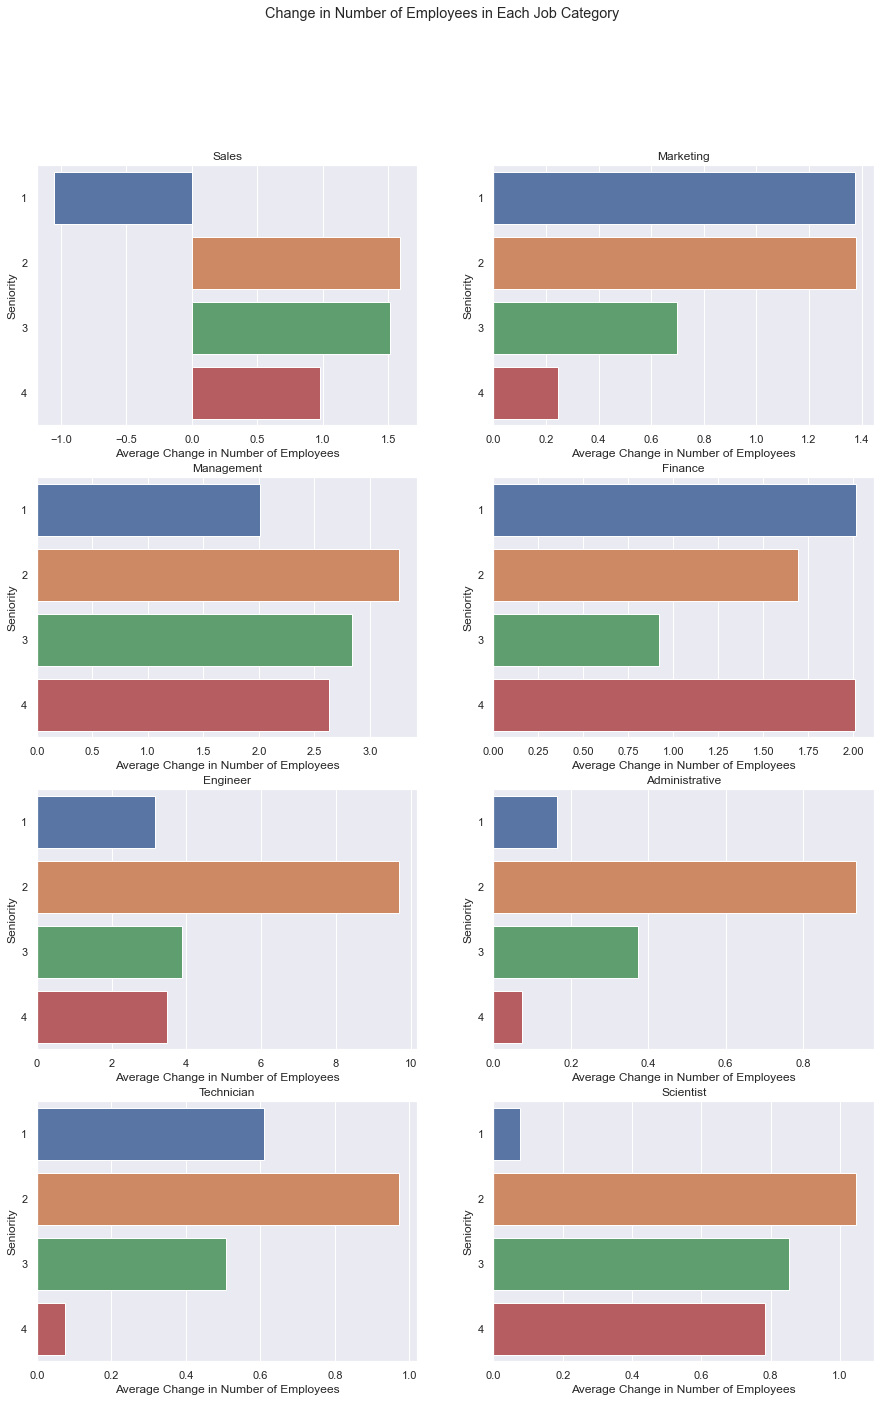

In [356]:
# Horizontal bar plots showing the mean salary by seniority in each job category
fig, ax = plt.subplots(4, 2, figsize = (15,22))
fig.suptitle('Change in Number of Employees in Each Job Category')

for job in list(q4_2_dict.keys()):
    
    if (job_list.index(job) < 4):
        m= job_list.index(job)
        n = 0
    else:
        m= job_list.index(job) - 4
        n = 1

    sns.barplot(data= q4_2_dict[job], x='change', y='seniority', ci=None, ax = ax[m, n], orient = 'h');
    ax[m, n].set_title(job.capitalize())
    ax[m, n].set_ylabel('Seniority')
    ax[m, n].set_xlabel('Average Change in Number of Employees');

The above plots shows the average change in the number of employees depending on the seniority of the position in each job category. It is hard to draw a conclusion on the overall pattern of the distribution, as each job category displays a unique trend. 
- The <strong> finance </strong> industry is quite notable, because the <strong>value for seniority 4 is almost the highest, only slightly behind that of seniority 1</strong>. This is the only category in which the change in number of employees of seniority 4 is higher than that of seniority 3. This suggests that in the finance sector, the job satisfaction is high for entry-level jobs and the highest senior employees, but lower in between. Considering the results from Question 2, the prospect of potential high salary with increasing seniority may lure more workers to enter the field, but the high time commitment may reduce the number of entry after seniority 1. Moreover, as shown in Question 1, the industry has a relatively large number of workers in seniority 4. Hence, it might be a characteristic of the finance sector to allowing the expansion of the workforce in seniority 4 by allowing a lot of newcomers. Hence, there might be less competition to enter a job with seniority 4 in finance, comapred to other job categories, resulting in a higher inflow of workers.
- In most of the categories, seniority 2 shows the highest average change in number of employees, conforming to the overall trend. <strong> In marketing and finance, the value for seniority 1 is similar or higher than that of seniority 2.</strong> A potential reason might be that these fields are more open to accept new workers without much prior experience and hence have less barriers for entry-level jobs. This may have caused a high inflow of workers. 
- In <strong> sales, the value for seniority 9 is negative, meaning that there are more workers leaving the field than entering </strong>. This signals job unsatisfaction and that the labor force in sales with lower seniority is shrinking in size. One potential reason is that many of the junior workers who used to work in sales are quitting once they build a little bit of experience and move to other related sectors such as marketing, management or finance. 

As such, the analysis of the change in number of employees does not show clear evidence that higher seniority jobs are more satisfactory to the workers. Still, the inflow of workers is higher than outflow, so <strong> the job is satisfactory to many of the workers, but the magnitude of the satisfaction does not seem to increase with seniority. </strong> Now, we move on to analyze the change in number of employees across <u>different regions around the world. </u>

In [357]:
# Create a data frame with 'region', 'inflow', 'outflow' and 'seniority' columns
q4_3 = workforce_data[['seniority', 'inflow', 'outflow', 'region']]
q4_3 = q4_3.dropna()
q4_3['change'] = q4_3['inflow']-q4_3['outflow']
q4_3

,seniority,inflow,outflow,region,change
0,1,214.52970,436.47480,Northern America,-221.94510
1,2,205.26310,348.88871,Northern America,-143.62561
2,4,152.43552,266.43818,Northern America,-114.00266
3,2,161.13381,353.45090,Northern America,-192.31709
4,3,141.85224,253.19327,Northern America,-111.34103
...,...,...,...,...,...
523483,4,0.00000,0.00000,Central America and the Caribbean,0.00000
523484,3,0.00000,0.00000,Northern Africa,0.00000
523485,4,0.00000,0.00000,Southern Europe,0.00000
523486,4,0.00000,0.00000,Northern Africa,0.00000


In [358]:
# Data frame showing the change in the number of employees by seniority in each region
q4_3 = q4_3.groupby(['region', 'seniority'], as_index=False).mean()
q4_3

,region,seniority,inflow,outflow,change
0,Arab States,1,0.926531,0.733854,0.192678
1,Arab States,2,1.553102,1.095450,0.457652
2,Arab States,3,1.104420,0.852833,0.251587
3,Arab States,4,0.895852,0.664931,0.230921
4,Central America and the Caribbean,1,3.210152,2.849083,0.361069
5,Central America and the Caribbean,2,3.346751,2.761940,0.584811
6,Central America and the Caribbean,3,1.959239,1.524451,0.434788
7,Central America and the Caribbean,4,1.637117,1.307728,0.329389
8,Central and Western Asia,1,1.274002,0.998100,0.275902
9,Central and Western Asia,2,1.714388,1.164051,0.550337


In [359]:
# Make a separate data frame for each region
# Append all data frames to an empty dictionary to use for plotting. 

q4_3_dict = {}
region_list = ['Arab States', 'Central America and the Caribbean','Central and Western Asia', 'Eastern Asia', 'Eastern Europe', 'Northern Africa', 'Northern America', 'Northern Europe', 'Pacific Islands', 'South America', 'South-Eastern Asia','Southern Asia', 'Southern Europe', 'Sub-Saharan Africa', 'Western Europe']
for region in region_list:
    
    q4_3_dict[region] = q4_3.loc[q2_3['region'] == region]

# This dictionary holds the regions as its keys and the dataframes for each region as its values
q4_3_dict

{'Arab States':         region  seniority    inflow   outflow    change
 0  Arab States          1  0.926531  0.733854  0.192678
 1  Arab States          2  1.553102  1.095450  0.457652
 2  Arab States          3  1.104420  0.852833  0.251587
 3  Arab States          4  0.895852  0.664931  0.230921,
 'Central America and the Caribbean':                               region  seniority    inflow   outflow    change
 4  Central America and the Caribbean          1  3.210152  2.849083  0.361069
 5  Central America and the Caribbean          2  3.346751  2.761940  0.584811
 6  Central America and the Caribbean          3  1.959239  1.524451  0.434788
 7  Central America and the Caribbean          4  1.637117  1.307728  0.329389,
 'Central and Western Asia':                       region  seniority    inflow   outflow    change
 8   Central and Western Asia          1  1.274002  0.998100  0.275902
 9   Central and Western Asia          2  1.714388  1.164051  0.550337
 10  Central and Western 

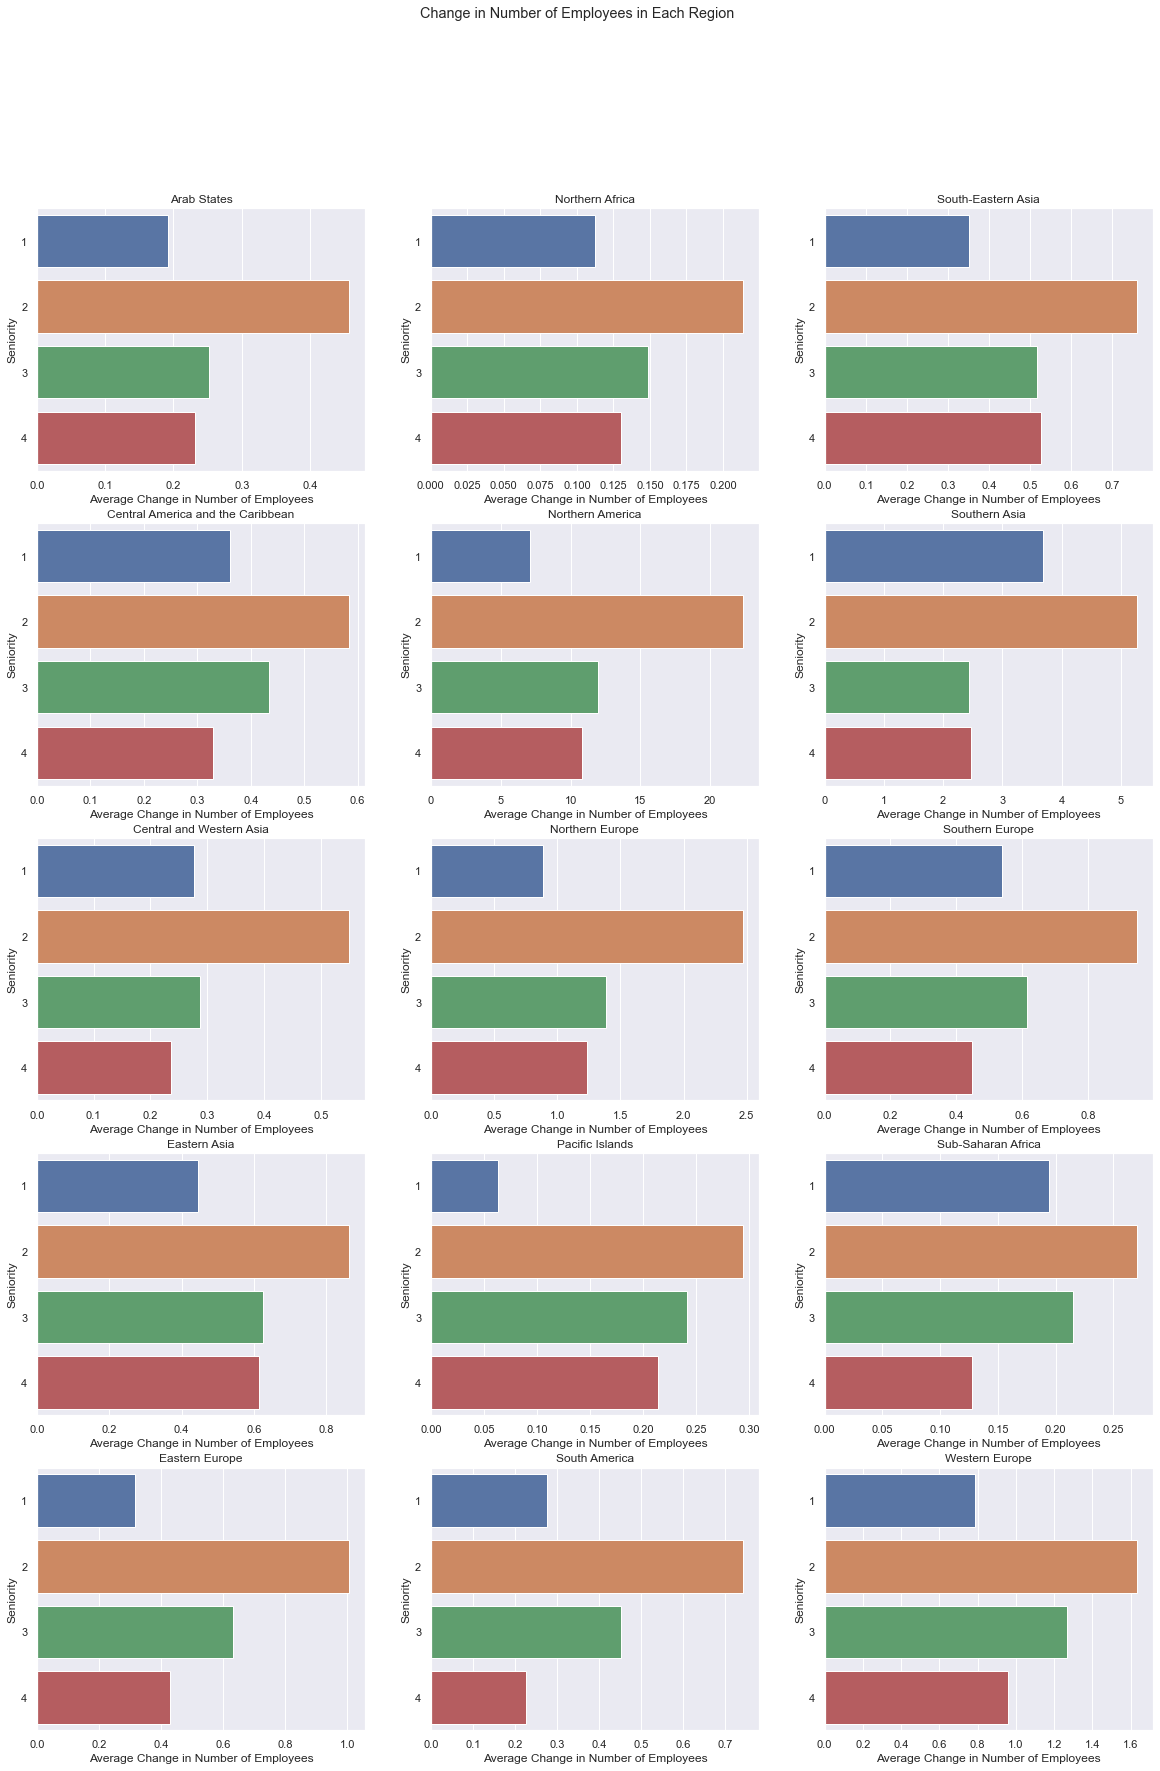

In [360]:
# Horizontal bar plots showing the mean salary by seniority in each region
fig, ax = plt.subplots(5, 3, figsize = (20, 28))
fig.suptitle('Change in Number of Employees in Each Region')

for region in list(q4_3_dict.keys()):
    
    if (region_list.index(region) < 5):
        m= region_list.index(region)
        n = 0
    elif (region_list.index(region) < 10):
        m= region_list.index(region)-5
        n = 1
    elif (region_list.index(region) < 15):
        m= region_list.index(region) - 10
        n = 2

    sns.barplot(data= q4_3_dict[region], x='change', y='seniority', ci=None, ax = ax[m, n], orient='h');
    ax[m, n].set_title(region)
    ax[m, n].set_ylabel('Seniority')
    ax[m, n].set_xlabel('Average Change in Number of Employees');

The above plots show that in most regions, the change in the number of employees by seniority is similar to that of the first plot in Question 3 with all of the regions combined. In all regions, seniority 2 is the level with the highest value, meaning that there are more people wanting to join the job than leaving it. 
- In South-Eastern Asia, Southern Asia, and Eastern Asia, the value for seniority 3 and 4 are approximately equal, meaning that job satisfaction in these higher seniority levels is relatively constant. This shows that <strong>compared to other regions in which seniority 4 seems to have lower job satisfaction, these Asian regions have less variability in job satisfaction in higher seniority jobs. </strong>
- Another notable region is Northern America. The value of inflow subtrated by outflow has a much higher magnitude than other regions. The lowest value in Northern America is for seniority 1 and it reads around 7, while in most regions, the highest value is less than 2. This shows that <strong>in Northern America, the labor force is expanding at a faster rate than other regions</strong>, as there are a lot of workers entering jobs of all the seniorities. 

➡️ Question 3 aimed to indirectly answer the question of job satisfaction among employees of different seniority levels. We found that there seems to be no evidence higher seniority jobs provide higher job satisfaction, as there are more workers entering lower seniority jobs than higher ones. Although inflow and outflow are insufficient to fully capture the complex concept of job satisfaction, the results suggest that 

### Conclusion

Through analysis of the overall economy, each job category and each region, we have explored the number of employees in each seniority level, how salary varies with seniority and lastly, how the turnover of employees varies with seniority. The dataset has evidence of the competition that junior employees have to go through to be promoted to a senior level position, as the number of employees generally decrease with level of seniority. In terms of what seniority has to offer, the dataset shows that senior employees do receive higher salaries and hence, combined with other potential perks from the companies, having seniority might provide good monetary benefits. However, we cannot see evidence that employees consider the higher seniority jobs as more desirable and satisfactory than junior level jobs, because the difference between inflow and outflow does show an increasing pattern with seniority. 

Hence, we can conclude that the question of whether attaining seniority is worth it or not depends on each individual employee's values. If one prioritizes financial compensation when deciding on a job, competing with other junior employees to get higher seniority will be desirable. However, if one values personal growth and satisfaction in the job higher than financial compensation, then the competition and the time and effort put into it might not be worth it. 